Import Library

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Image, display

Show Original Image

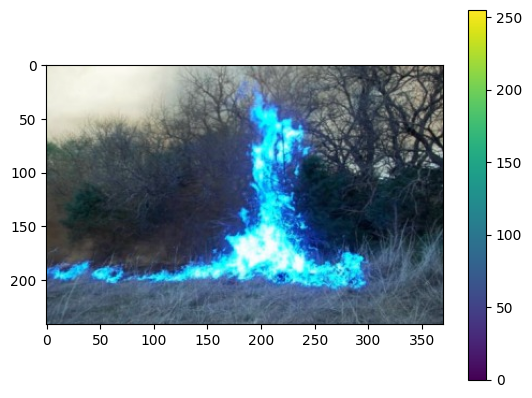

In [7]:
# Load image
# Baca citra dalam format BGR (default OpenCV)
image = cv2.imread('./image/image1.jpg')

# Tampilkan citra Original (RGB)
# cv2.imshow('Image Original', image_bgr)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# plt.pcolormesh(image_bgr)
plt.imshow(image)
plt.colorbar()

Convert to HSV

In [8]:
#load original citra
image_bgr = cv2.imread('./image/image1.jpg')

# Konversi citra ke format HSV
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# Simpan citra HSV
cv2.imwrite('./image/hsv/image1_hsv.jpg', image_hsv)

# Tampilkan citra HSV
cv2.imshow('HSV Image', image_hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

Using Threshold in HSV

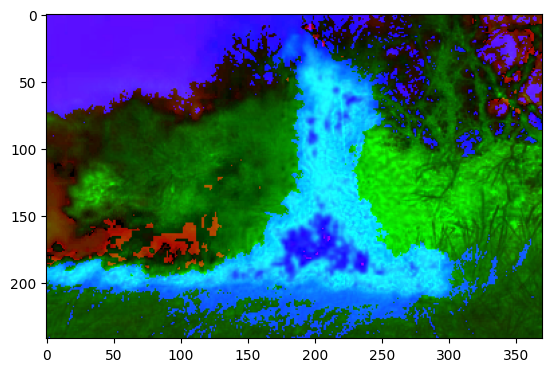

In [9]:
# Ambil channel H, S, V dari citra HSV
h_channel, s_channel, v_channel = cv2.split(image_hsv)

# Threshold pada channel V menggunakan nilai threshold min dan max
threshold_min = 130
threshold_max = 255
_, v_thresh = cv2.threshold(v_channel, threshold_min, threshold_max, cv2.THRESH_BINARY)

# Gabungkan kembali channel H, S, dan channel V yang telah di-threshold
thresholded_image = cv2.merge((h_channel, s_channel, v_thresh))

# Simpan citra HSV Threshold
cv2.imwrite('./image/hsv/image1_hsv_threshold.jpg', thresholded_image)

# Tampilkan citra hasil thresholding
# cv2.imshow('Thresholded Image', thresholded_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(thresholded_image)
plt.show()

Convert Citra to Grayscale

In [10]:
def hsv_to_grayscale(hsv_image):
    # Ambil komponen Hue, Saturation, dan Value dari citra HSV
    hue, saturation, value = cv2.split(hsv_image)
    
    # Hitung nilai rata-rata dari komponen Hue, Saturation, dan Value
    grayscale_image = np.mean([hue, saturation, value], axis=0).astype(np.uint8)
    
    return grayscale_image

# Baca citra HSV
hsv_image = cv2.imread('./image/hsv/image1_hsv_threshold.jpg', cv2.IMREAD_COLOR)

# Konversi citra dari format HSV ke grayscale
grayscale_image = hsv_to_grayscale(hsv_image)

# Simpan citra grayscale
cv2.imwrite('./image/grayscale/image1_grayscale.jpg', grayscale_image)

# Tampilkan citra grayscale
cv2.imshow('Grayscale Image', grayscale_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Using Threshold in Grayscale

In [7]:
def apply_threshold(image, threshold_value):
    # Lakukan thresholding menggunakan metode Binary
    _, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    
    return thresholded_image

# Baca citra grayscale
grayscale_image = cv2.imread('./image/grayscale/image1_grayscale.jpg', cv2.IMREAD_GRAYSCALE)

# Tentukan nilai threshold
threshold_value = 128

# Terapkan thresholding pada citra grayscale
thresholded_image = apply_threshold(grayscale_image, threshold_value)

# Simpan citra hasil thresholding
cv2.imwrite('./image/grayscale/image1_grayscale_thresholding.jpg', thresholded_image)

# Tampilkan citra hasil thresholding
cv2.imshow('Thresholded Image', thresholded_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Threshold Grayscale yang benar

In [11]:
# Apply thresholding
_, threshold = cv2.threshold(grayscale_image, 143, 255, cv2.THRESH_BINARY)

# # Combine grayscale image and thresholded image
# combined = cv2.cvtColor(grayscale_image, cv2.COLOR_GRAY2BGR)
# combined[np.where(threshold == 255)] = [0, 0, 255]  # Set thresholded regions to red color
combined = threshold

# Display the combined image
cv2.imshow('Combined Image', combined)
cv2.waitKey(0)
cv2.destroyAllWindows()

Citra Contour Sebaran Api

In [42]:
# # Load citra sebaran api
# image = cv2.imread('./image/image1.png')

# # Ubah citra ke format HSV
# hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# # Definisikan rentang warna api dalam HSV
# lower_fire = np.array([0, 50, 50])
# upper_fire = np.array([10, 255, 255])

# # Buat masker dengan menggunakan rentang warna api
# mask = cv2.inRange(hsv_image, lower_fire, upper_fire)

# # Terapkan operasi morfologi untuk menghilangkan noise
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
# opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# # Temukan kontur pada citra hasil operasi morfologi
# contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Gambar kontur pada citra asli
# cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# # Tampilkan citra dengan kontur
# cv2.imshow('Fire Contour', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


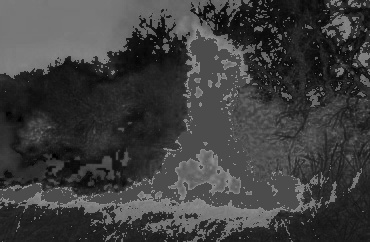

In [43]:
# Plot the image
def imshow(img, ax=None):
    if ax is None:
        ret, encoded = cv2.imencode(".jpg", img)
        display(Image(encoded))
    else:
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
  
#Image loading
img = cv2.imread("./image/image1.png")
  
#image grayscale conversion
gray = cv2.cvtColor(combined, cv2.COLOR_BGR2GRAY)
# Show image
imshow(gray)
plt.imsave('./image/imageplt.jpg' ,img)

In [45]:
# #load original citra
# img = io.imread('./image/image1.jpg')

# # Konversi citra ke format HSV
# im_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# mask = cv2.inRange(im_hsv, (100,90,90), (120,255,255))
# # plt.imshow(mask)
# plt.imshow(img)

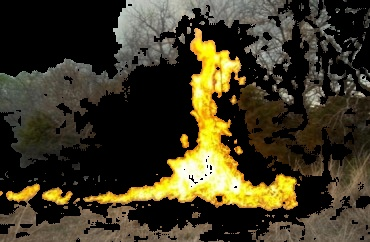

In [40]:
## Read
img = cv2.imread("./image/image1.jpg")

## convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

## mask of green (36,0,0) ~ (70, 255,255)
mask1 = cv2.inRange(hsv, (36, 0, 0), (70, 255,255))

## mask o yellow (15,0,0) ~ (36, 255, 255)
mask2 = cv2.inRange(hsv, (15,0,0), (36, 255, 255))

## final mask and masked
mask = cv2.bitwise_or(mask1, mask2)
target = cv2.bitwise_and(img,img, mask=mask)

cv2.imwrite("target.png", target)
imshow(target)

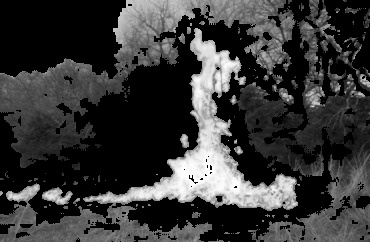

In [15]:
# Plot the image
def imshow(img, ax=None):
    if ax is None:
        ret, encoded = cv2.imencode(".jpg", img)
        display(Image(encoded))
    else:
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
  
#Image loading
img = cv2.imread("target.png")
  
#image grayscale conversion
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Show image
imshow(gray)
# plt.imsave('./image/imageplt.jpg' ,img)

In [16]:
# # Load citra sebaran api
image = cv2.imread('./image/image1.png')

# # Terapkan operasi morfologi untuk menghilangkan noise
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
# opening = cv2.morphologyEx(target, cv2.MORPH_OPEN, kernel)

# # Temukan kontur pada citra hasil operasi morfologi
# contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Gambar kontur pada citra asli
# cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# Konversi citra ke citra biner (grayscale dengan tipe data CV_8UC1)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

# Temukan kontur pada citra biner
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada citra asli
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)


# Tampilkan citra dengan kontur
cv2.imshow('Fire Contour', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [58]:
# Load citra sebaran api
image = cv2.imread('./image/image1.png')

## convert to hsv
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# # Tentukan rentang warna sebaran api dalam format HSV
lower_fire = np.array([23, 100, 100])
upper_fire = np.array([30, 255, 255])

# Buat mask menggunakan inRange
mask = cv2.inRange(hsv, lower_fire, upper_fire)

# Temukan kontur pada citra hasil operasi morfologi
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada citra asli
cv2.drawContours(image, contours, -1, (0, 255, 0), 1)

# Tampilkan citra dengan kontur
cv2.imshow('Fire Contour', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Morphologi

In [7]:
# Load citra grayscale
# gray_image = cv2.imread('./image/grayscale/image1_grayscale.jpg', cv2.IMREAD_GRAYSCALE)
gray_image = cv2.imread('./image/grayscale/image1_grayscale_thresholding.jpg', cv2.IMREAD_GRAYSCALE)

# # Melakukan thresholding pada citra grayscale
# _, threshold_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Definisikan kernel untuk operasi morfologi terbuka
kernel = np.ones((5, 5), np.uint8)

# Lakukan operasi morfologi terbuka pada citra hasil thresholding
# opening_image = cv2.morphologyEx(threshold_image, cv2.MORPH_OPEN, kernel)
opening_image = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)

# # Tampilkan citra grayscale
# cv2.imshow('Grayscale Image', gray_image)

# # Tampilkan citra hasil thresholding
# cv2.imshow('Threshold Image', threshold_image)

# Tampilkan citra hasil operasi morfologi terbuka
cv2.imwrite('image_morphology.png', opening_image)
cv2.imshow('Opening Image', opening_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


Morphologi yang benar

In [12]:
# Define the structuring element for morphological operation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))

# Perform morphological opening
opened = cv2.morphologyEx(combined, cv2.MORPH_OPEN, kernel)

# Display the original and opened images
cv2.imshow('Opened Image', opened)
cv2.waitKey(0)
cv2.destroyAllWindows()

Transformasi Jarak

In [11]:
# Dapatkan transformasi jarak dari citra hasil morfologi terbuka
dist_transform = cv2.distanceTransform(opening_image, cv2.DIST_L2, 3)

# Normalisasi transformasi jarak untuk tampilan yang lebih baik
dist_transform = cv2.normalize(dist_transform, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

ret, sure_fg = cv2.threshold(dist_transform, 0.01*dist_transform.max(), 255,0 )
plt.imshow(sure_fg, 'gray')

# # Tampilkan citra transformasi jarak
# cv2.imwrite('image_transformasi_jarak.png', dist_transform)
# cv2.imshow('Distance Transform', dist_transform)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

sure_fg = np.uint8(sure_fg)

# Dapatkan area yang tidak termasuk dalam area objek menggunakan operasi pengurangan (dapatkan area background)
sure_bg = cv2.subtract(opening_image, sure_fg.astype(np.uint8))

plt.imshow(sure_fg)

Transformasi jarak yang benar

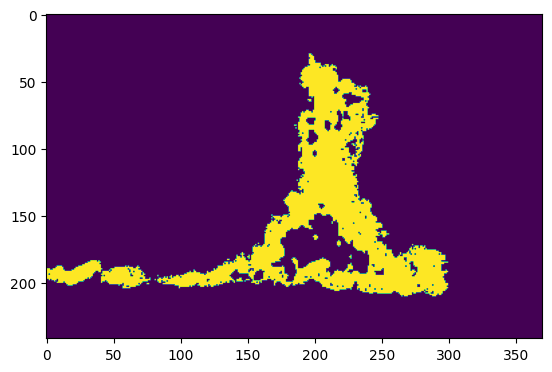

In [9]:
# Dapatkan transformasi jarak dari citra hasil morfologi terbuka
dist_transform = cv2.distanceTransform(opened, cv2.DIST_L2, 3)

# Normalisasi transformasi jarak untuk tampilan yang lebih baik
dist_transform = cv2.normalize(dist_transform, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

ret, sure_fg = cv2.threshold(dist_transform, 0.01*dist_transform.max(), 255,0 )
plt.imshow(sure_fg)

# # Tampilkan citra transformasi jarak
# cv2.imwrite('image_transformasi_jarak.png', dist_transform)
# cv2.imshow('Distance Transform', dist_transform)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# sure_fg = np.uint8(sure_fg)

# # Dapatkan area yang tidak termasuk dalam area objek menggunakan operasi pengurangan (dapatkan area background)
sure_bg = cv2.subtract(opened, sure_fg.astype(np.uint8))

# plt.imshow(sure_bg)

Transformasi jarak versi 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


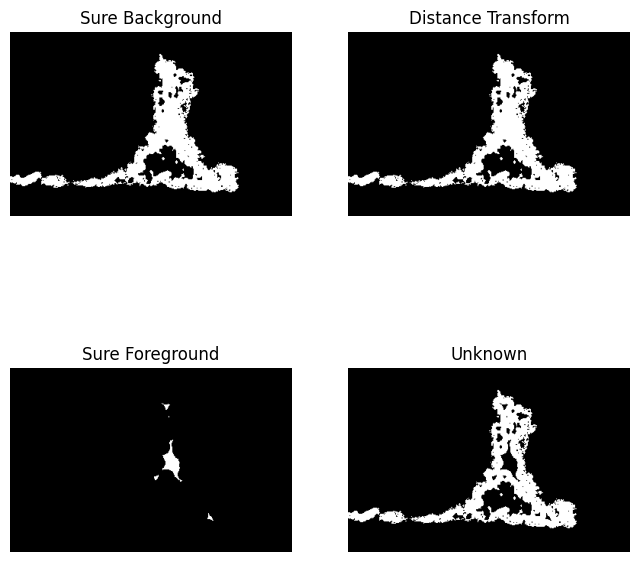

In [13]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
# sure background area
sure_bg = cv2.dilate(combined, kernel, iterations=3)
imshow(sure_bg, axes[0,0])
axes[0, 0].set_title('Sure Background')

# Distance transform
dist = cv2.distanceTransform(combined, cv2.DIST_L2, 5)
imshow(dist, axes[0,1])
axes[0, 1].set_title('Distance Transform')

#foreground area
ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
imshow(sure_fg, axes[1,0])
axes[1, 0].set_title('Sure Foreground')

# unknown area
unknown = cv2.subtract(sure_bg, sure_fg)
imshow(unknown, axes[1,1])
axes[1, 1].set_title('Unknown')

plt.show()

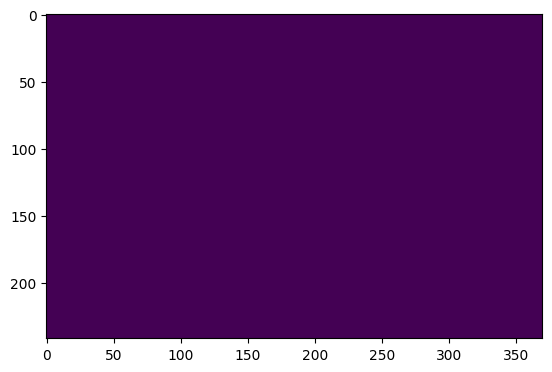

In [11]:
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown)

Marker original

In [11]:
ret3, markerss = cv2.connectedComponents(sure_fg)
plt.imshow(markerss, 'gray')

Marker yang benar

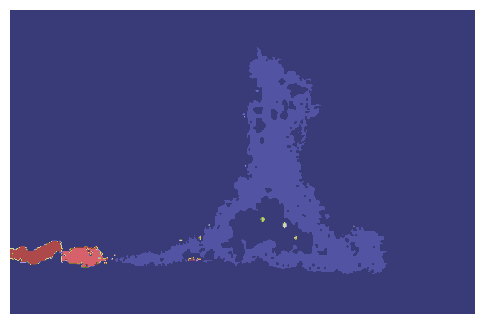

In [15]:
# Marker labelling
# sure foreground 
ret, markers = cv2.connectedComponents(sure_fg)
  
# Add one to all labels so that background is not 0, but 1
markers += 1
# mark the region of unknown with zero
markers[unknown == 255] = 0
  
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

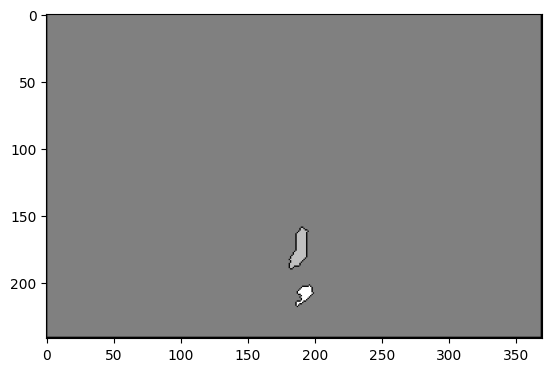

In [46]:
markess = markerss + 10
markerss[unknown == 255] = 0
plt.imshow(markerss, 'gray')

In [47]:
img = cv2.imread('./image/image1.png')
markerss = cv2.watershed(img, markerss)

In [48]:
print(markerss)

[[-1 -1 -1 ... -1 -1 -1]
 [-1  1  1 ...  1  1 -1]
 [-1  1  1 ...  1  1 -1]
 ...
 [-1  1  1 ...  1  1 -1]
 [-1  1  1 ...  1  1 -1]
 [-1 -1 -1 ... -1 -1 -1]]


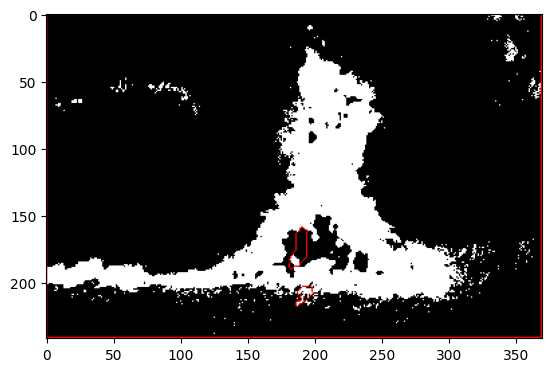

In [49]:
img[markerss == -1] = [255,0,0]
plt.imshow(img)

Segmentasi Watershed

In [52]:
# # Terapkan segmentasi Watershed
# ret, markers = cv2.connectedComponents(dist_transform)

# # Tandai kontur pada citra asli dengan warna biru
# image_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
# # image_rgb[markers == -1] = [0, 0, 255]

# # # Tampilkan citra hasil segmentasi Watershed
# # cv2.imshow('Segmented Image', image_rgb)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()